In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [10]:
X = iris.data
y = iris.target

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Model 1: Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [12]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

<ErrorbarContainer object of 3 artists>

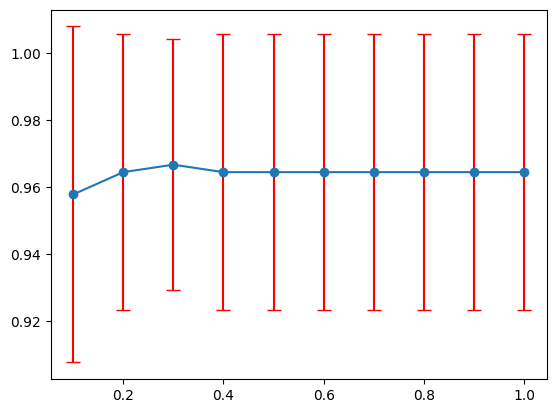

In [48]:
penalty = np.arange(0.1,1.1, 0.1)
output_mean = []
output_std = []

for c in penalty:
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C = c)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    output_mean.append(n_scores.mean())
    output_std.append(n_scores.std())

plt.errorbar(penalty, output_mean, output_std, fmt='-o', ecolor = 'red', capsize = 5)

# Model 2: Decision Tree

<ErrorbarContainer object of 3 artists>

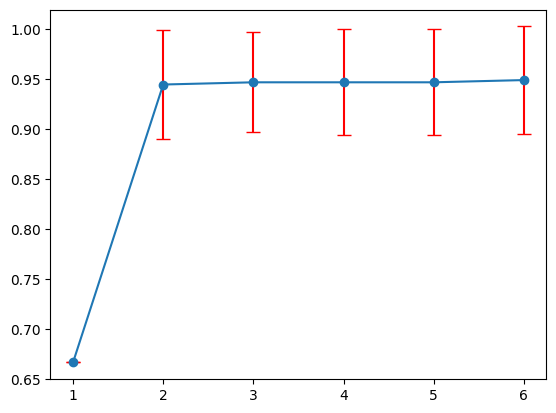

In [53]:
from sklearn.tree import DecisionTreeClassifier

depth = np.arange(1, 7)
output_mean = []
output_std = []

for d in depth:
    model = DecisionTreeClassifier(max_depth = d)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs = -1)
    output_mean.append(n_scores.mean())
    output_std.append(n_scores.std())

plt.errorbar(depth, output_mean, output_std, fmt='-o', ecolor = 'red', capsize = 5) 

# Model 3: SVM

<ErrorbarContainer object of 3 artists>

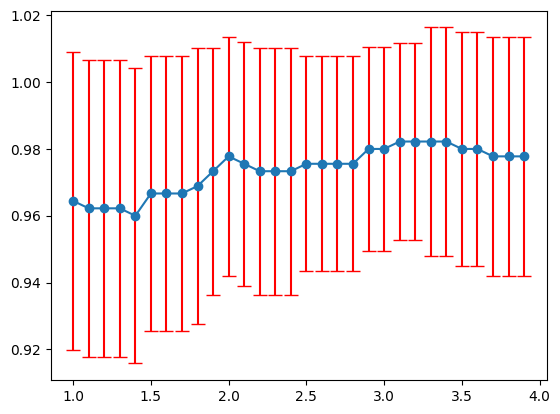

In [57]:
from sklearn.svm import SVC

C = np.arange(1, 4, 0.1)
output_mean = []
output_std = []

for c in C:
    model = SVC(C = c)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs = -1)
    output_mean.append(n_scores.mean())
    output_std.append(n_scores.std())

plt.errorbar(C, output_mean, output_std, fmt='-o', ecolor = 'red', capsize = 5) 

# Model 4: KNN

<ErrorbarContainer object of 3 artists>

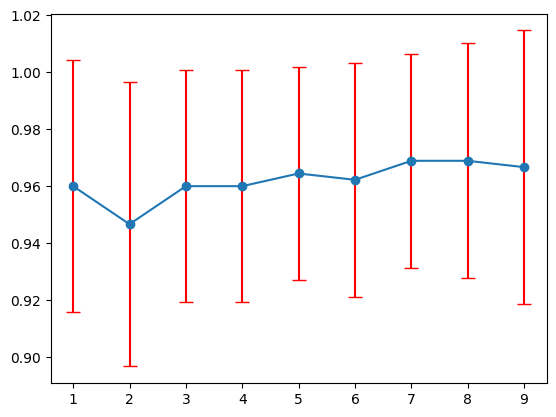

In [60]:
from sklearn.neighbors import KNeighborsClassifier 

N = np.arange(1, 10)
output_mean = []
output_std = []

for n in N:
    model = KNeighborsClassifier(n_neighbors = n)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs = -1)
    output_mean.append(n_scores.mean())
    output_std.append(n_scores.std())

plt.errorbar(N, output_mean, output_std, fmt='-o', ecolor = 'red', capsize = 5) 

# Model 5: Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs = -1)
print(n_scores.mean())
print(n_scores.std())

0.9555555555555557
0.046613726585340055
